In [9]:
%load_ext autoreload
%autoreload 2

from msr.signals.ecg import ECGSignal
from msr.data.raw.ptbxl import load_ptbxl_raw_data, FS
from msr.data.measurements.ptbxl import PtbXLMeasurement
import matplotlib.pyplot as plt
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# **Loading data and creating Signals objects**

In [12]:
data = load_ptbxl_raw_data("val").numpy()
print(data.shape)

idx = 0
ecg_leads = data[idx].T
ecg_lead_2 = ecg_leads[1]

ecg_sig = ECGSignal("ecg_2", ecg_lead_2, fs=FS)
ptbxl_measurement = MultiChannelPtbXLSignal(ecg_leads, fs=FS)

ecg_sig.set_beats()
ecg_sig.set_agg_beat()

ptbxl_measurement.set_beats(source_channel="ecg_2")
ptbxl_measurement.set_agg_beat()

(1642, 1000, 12)


/home/shate/.cache/pypoetry/virtualenvs/msr-xbuxOujG-py3.8/lib/python3.8/site-packages/neurokit2/epochs/epochs_create.py:205: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for colname, column in epochs[i].select_dtypes(include=["object"]).iteritems():
/home/shate/.cache/pypoetry/virtualenvs/msr-xbuxOujG-py3.8/lib/python3.8/site-packages/neurokit2/epochs/epochs_create.py:205: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for colname, column in epochs[i].select_dtypes(include=["object"]).iteritems():
/home/shate/.cache/pypoetry/virtualenvs/msr-xbuxOujG-py3.8/lib/python3.8/site-packages/neurokit2/epochs/epochs_create.py:205: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for colname, column in epochs[i].select_dtypes(include=["object"]).iteritems():


# **ECGSignal feature extraction**

{'ecg_2_basic_features__mean': 0.004547999999999988,
 'ecg_2_basic_features__std': 0.3398863099567266,
 'ecg_2_basic_features__median': 0.081,
 'ecg_2_basic_features__skewness': -0.3327771344386133,
 'ecg_2_basic_features__kurtosis': -1.1503023281350755,
 'ecg_2_agg_beat_features__ecg_2_agg_beat_basic_features__mean': 0.008749424733254997,
 'ecg_2_agg_beat_features__ecg_2_agg_beat_basic_features__std': 0.07855954158362914,
 'ecg_2_agg_beat_features__ecg_2_agg_beat_basic_features__median': -0.01971745303407207,
 'ecg_2_agg_beat_features__ecg_2_agg_beat_basic_features__skewness': 1.5626182614467863,
 'ecg_2_agg_beat_features__ecg_2_agg_beat_basic_features__kurtosis': 2.1259582911791037,
 'ecg_2_agg_beat_features__ecg_2_agg_beat_crit_points__p_onset_loc': 11,
 'ecg_2_agg_beat_features__ecg_2_agg_beat_crit_points__p_onset_time': 0.074052,
 'ecg_2_agg_beat_features__ecg_2_agg_beat_crit_points__p_onset_val': -0.03907060261725876,
 'ecg_2_agg_beat_features__ecg_2_agg_beat_crit_points__p_loc':

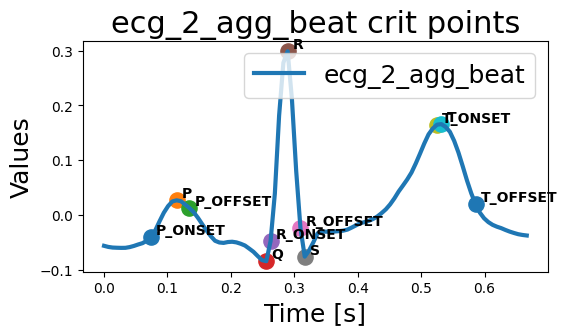

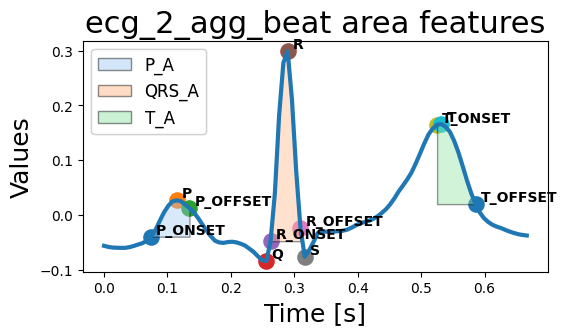

In [11]:
ecg_feats = dict(ecg_sig.extract_features(return_arr=False, plot=True))
ecg_feats

# **PtbXLMeasurement feature extraction**

/home/shate/Desktop/praca_magisterska/medical_signal_representation/msr/signals/base.py:543: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=self.fig_params['fig_size'])


{'ecg_12_basic_features__mean': 0.002064999999999998,
 'ecg_12_basic_features__std': 0.1866449537892734,
 'ecg_12_basic_features__median': -0.04,
 'ecg_12_basic_features__skewness': 1.8222458831191433,
 'ecg_12_basic_features__kurtosis': 6.199837767396412,
 'ecg_12_agg_beat_features__ecg_12_agg_beat_basic_features__mean': 0.012517127425442238,
 'ecg_12_agg_beat_features__ecg_12_agg_beat_basic_features__std': 0.1410165130872809,
 'ecg_12_agg_beat_features__ecg_12_agg_beat_basic_features__median': -0.03784859781673336,
 'ecg_12_agg_beat_features__ecg_12_agg_beat_basic_features__skewness': 2.000416414367855,
 'ecg_12_agg_beat_features__ecg_12_agg_beat_basic_features__kurtosis': 4.768249433068115,
 'ecg_12_agg_beat_features__ecg_12_agg_beat_crit_points__p_onset_loc': 11,
 'ecg_12_agg_beat_features__ecg_12_agg_beat_crit_points__p_onset_time': 0.07405199999999999,
 'ecg_12_agg_beat_features__ecg_12_agg_beat_crit_points__p_onset_val': -0.05880709424480705,
 'ecg_12_agg_beat_features__ecg_12_a

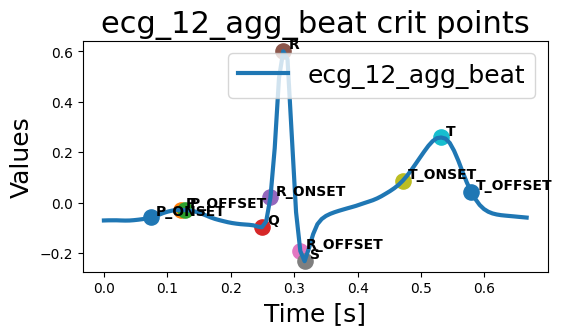

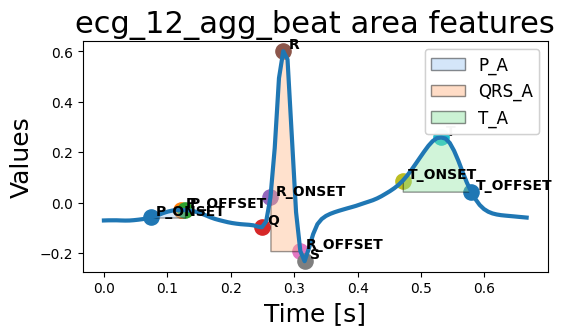

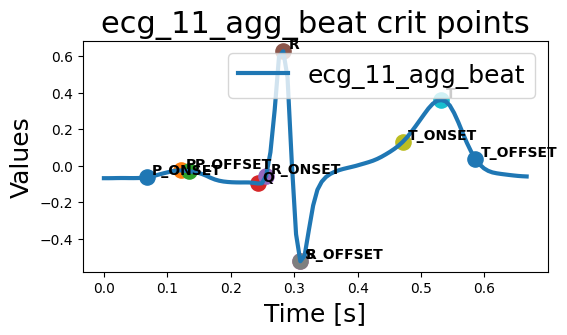

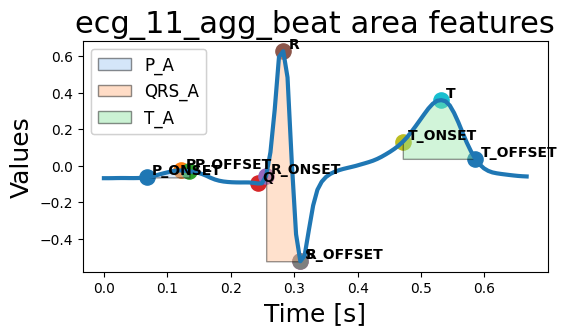

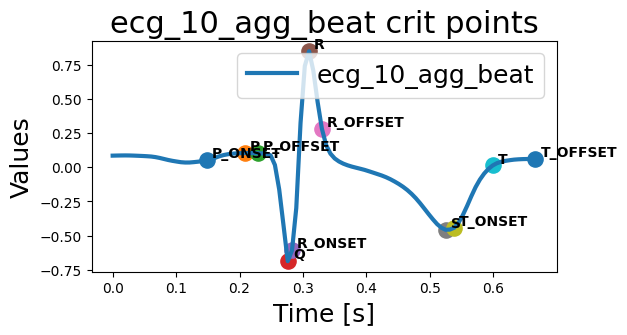

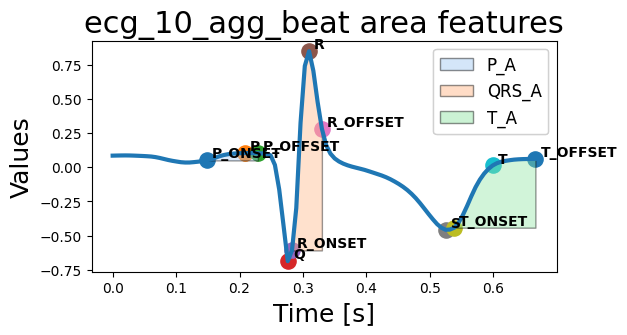

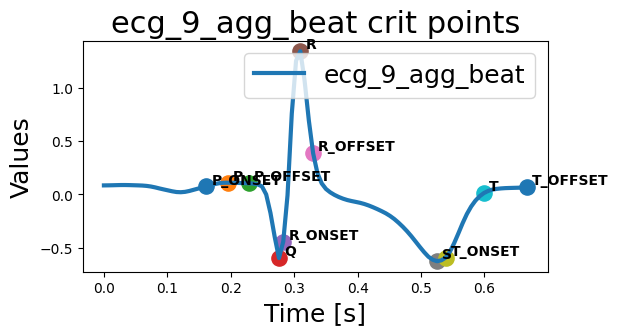

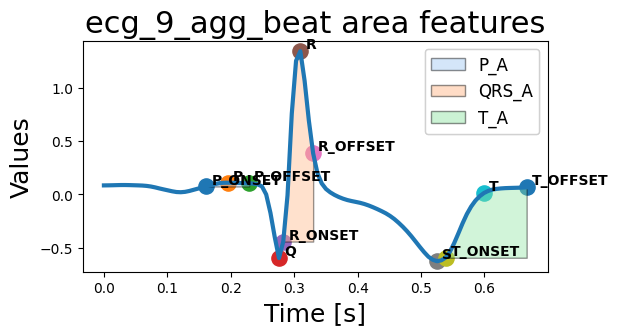

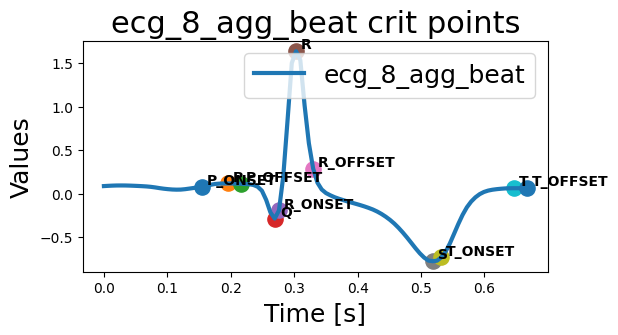

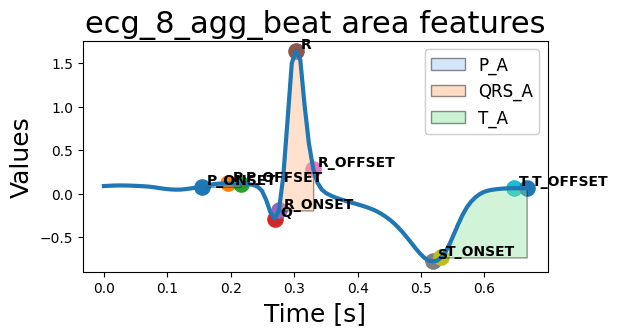

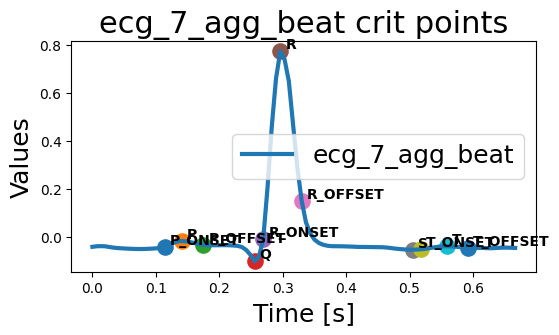

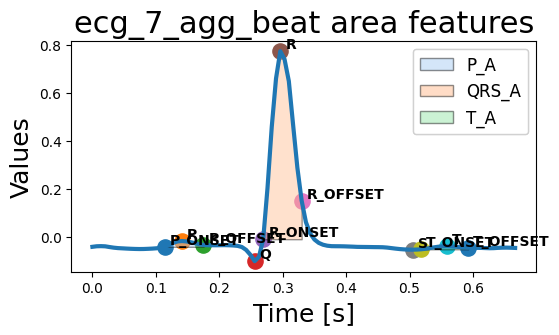

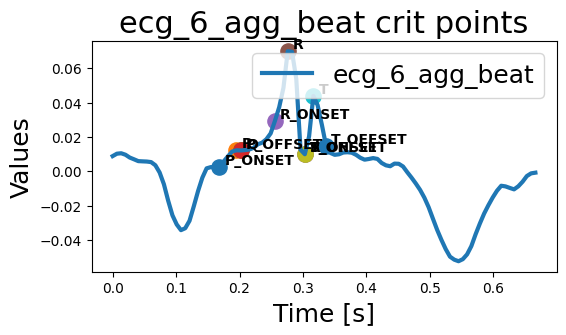

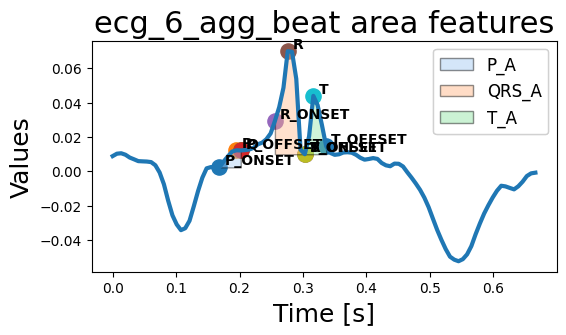

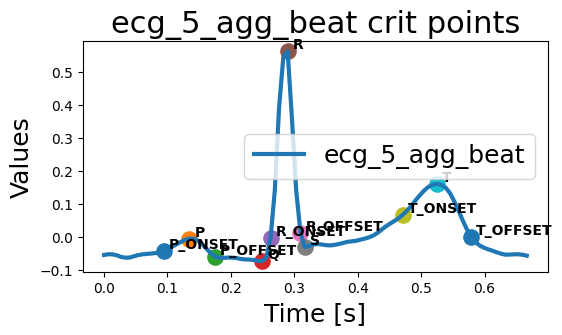

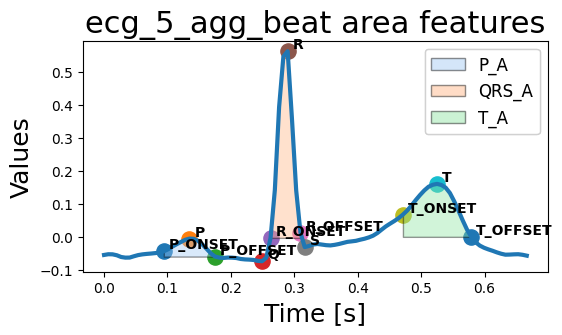

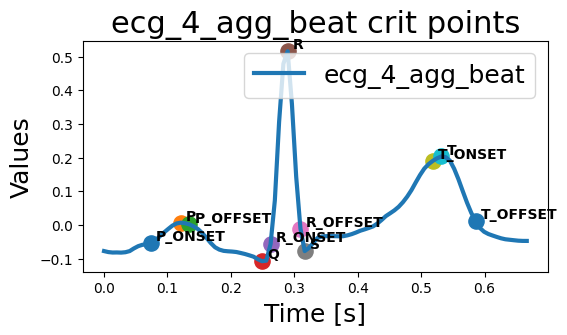

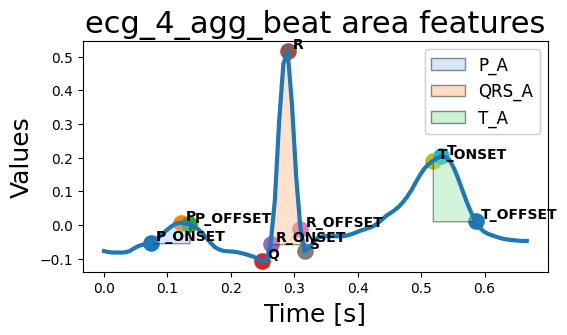

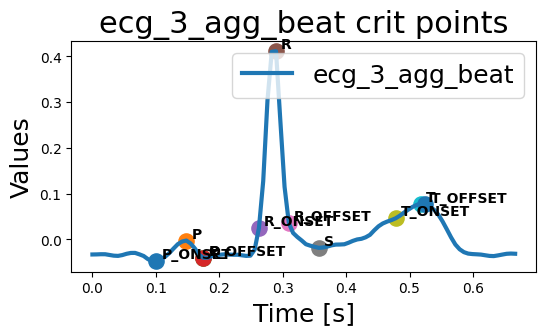

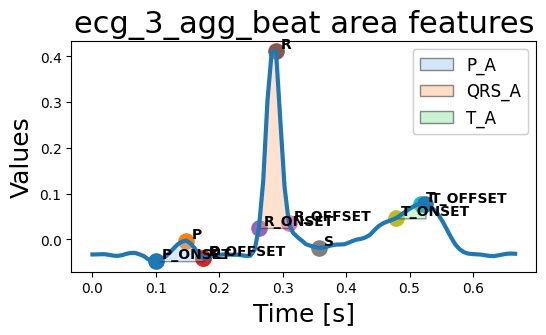

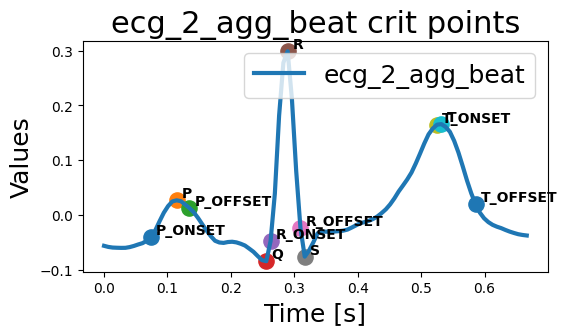

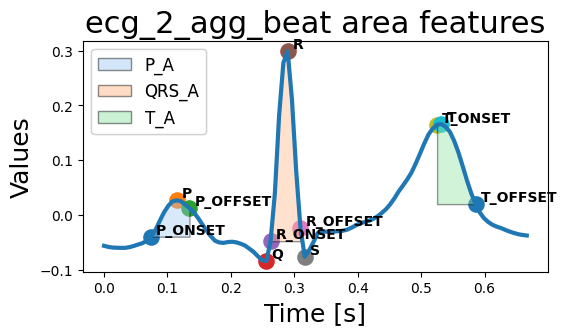

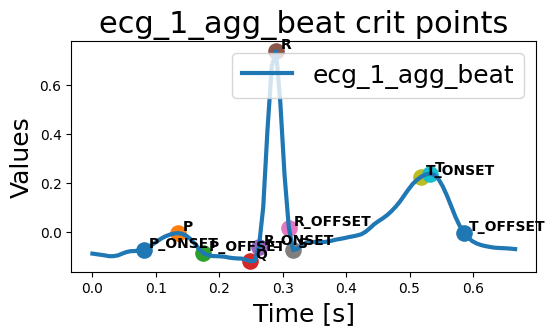

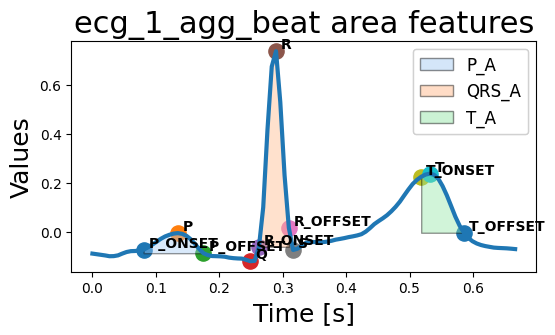

In [13]:
ptbxl_feats = dict(ptbxl_measurement.extract_features(return_arr=False, plot=True))
ptbxl_feats

## as array

In [7]:
array_feats = ptbxl_measurement.extract_features(return_arr=True, plot=False)
print(array_feats)
print(array_feats.shape)
print(ptbxl_measurement.feature_names)

[ 2.06500000e-03  1.86644954e-01 -4.00000000e-02  1.82224588e+00
  6.19983777e+00  1.25171274e-02  1.41016513e-01 -3.78485978e-02
  2.00041641e+00  4.76824943e+00  1.10000000e+01  7.40520000e-02
 -5.88070942e-02  1.80000000e+01  1.21176000e-01 -2.87752351e-02
  1.90000000e+01  1.27908000e-01 -2.92196816e-02  3.70000000e+01
  2.49084000e-01 -9.75124801e-02  3.90000000e+01  2.62548000e-01
  2.06825106e-02  4.20000000e+01  2.82744000e-01  6.00912455e-01
  4.60000000e+01  3.09672000e-01 -1.92082063e-01  4.70000000e+01
  3.16404000e-01 -2.32284984e-01  7.00000000e+01  4.71240000e-01
  8.73559555e-02  7.90000000e+01  5.31828000e-01  2.58635921e-01
  8.60000000e+01  5.78952000e-01  4.38120929e-02  1.07878370e-03
  2.26634795e-02  1.47216849e-02  1.49825057e-02  1.08447866e+00
  5.89846498e-01  6.37294353e-01 -6.60199782e-02  2.87299438e+01
 -2.94486972e+01  2.82696187e+00 -4.55869256e+00  8.14545455e-01
  1.55876620e-02  8.64250000e-01  3.47100000e-03  2.25766767e-01
 -3.50000000e-02  1.01520